# Tworzenie grafu

W zadaniu tworzenia grafu roboczo zostały wykorzystane dwie cechy: amenity: bicycle_parking i amenity: vending_machine. W związku z ilościową oceną cech, finalna postać dataframe cech to zwykły Pandas.

Graf został utworzony zgodnie z regułą: jesli krawędź jednego poligonu dotyka krawędzi innego to tworzona jest pomiędzy nimi krawędź w grafie.

In [5]:
import srai
import pandas as pd
import geopandas as gpd
from srai.regionalizers import H3Regionalizer, geocode_to_region_gdf
from srai.embedders import CountEmbedder
from srai.joiners import IntersectionJoiner
from srai.loaders import OSMOnlineLoader
import networkx as nx


In [6]:
area = geocode_to_region_gdf("Wrocław, Poland")
regionalizer = H3Regionalizer(resolution=8) # https://h3geo.org/docs/core-library/restable/
regions = regionalizer.transform(area)
graph = nx.Graph()


In [9]:
regions.head()

,geometry
region_id,
881e204015fffff,"POLYGON ((16.96177 51.11484, 16.95936 51.11055..."
881e204745fffff,"POLYGON ((17.06636 51.15329, 17.06394 51.14902..."
881e204767fffff,"POLYGON ((17.06176 51.13297, 17.05934 51.12869..."
881e204755fffff,"POLYGON ((17.10149 51.15432, 17.09907 51.15005..."
881e204e09fffff,"POLYGON ((17.04073 51.05911, 17.03832 51.05483..."


In [10]:
regions.iloc[0]

geometry    POLYGON ((16.96177 51.11484, 16.95936 51.11055...
Name: 881e204015fffff, dtype: geometry

In [12]:
type(regions.iloc[1])

pandas.core.series.Series

In [7]:
gdf = regions.copy()

In [14]:
gdf.columns

Index(['geometry'], dtype='object')

In [15]:
regions.columns

Index(['geometry'], dtype='object')

In [16]:
for index, row in gdf.iterrows():
    current_polygon = row['geometry']
    
    # Check for intersections with other polygons
    for other_index, other_row in gdf.iterrows():
        if index != other_index:  # Skip self-intersection check
            other_polygon = other_row['geometry']
            
            # Check if the current polygon shares a boundary with the other polygon
            if current_polygon.touches(other_polygon):
                # Add an edge to the graph
                graph.add_edge(index, other_index)

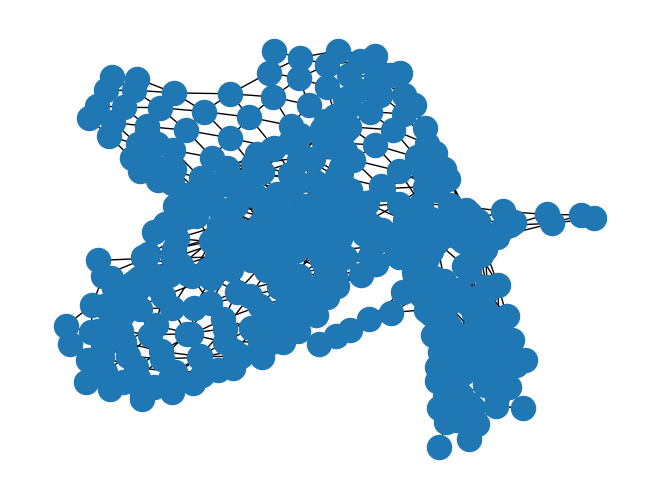

In [18]:
nx.draw(graph)

In [19]:
graph.nodes

NodeView(('881e204015fffff', '881e20403bfffff', '881e204011fffff', '881e204017fffff', '881e204003fffff', '881e20401dfffff', '881e204039fffff', '881e204745fffff', '881e20476bfffff', '881e20474dfffff', '881e204769fffff', '881e204741fffff', '881e204293fffff', '881e204747fffff', '881e204767fffff', '881e204765fffff', '881e204729fffff', '881e204761fffff', '881e20472dfffff', '881e204763fffff', '881e2040dbfffff', '881e204755fffff', '881e204743fffff', '881e204751fffff', '881e204709fffff', '881e204757fffff', '881e20470bfffff', '881e20475dfffff', '881e204e09fffff', '881e204e0dfffff', '881e204e55fffff', '881e204e47fffff', '881e204e01fffff', '881e204e43fffff', '881e204e0bfffff', '881e2040b9fffff', '881e204087fffff', '881e2040bbfffff', '881e204095fffff', '881e204083fffff', '881e2040bdfffff', '881e2040b1fffff', '881e20434bfffff', '881e20435dfffff', '881e204341fffff', '881e2051b5fffff', '881e2051b7fffff', '881e204349fffff', '881e204343fffff', '881e204243fffff', '881e20424bfffff', '881e204241fffff', '8

In [ ]:

# the code that will be used (probably) to add node attributes based on the node id (so the region identifier)

# # Iterate through the DataFrame rows and add node attributes to the graph
# for index, row in df.iterrows():
#     node_id = row['id']  # Assuming 'id' is the column with node IDs
    
#     # Create a dictionary of attributes based on the features in the DataFrame
#     node_attributes = {
#         feature_name: row[feature_name]  # Assuming feature names match DataFrame column names
#         for feature_name in df.columns if feature_name != 'id'  # Exclude the 'id' column
#     }
    
#     # Add node attributes to the graph
#     nx.set_node_attributes(graph, {node_id: node_attributes})